In [1]:
import torch as tc
import tensorflow as tf
import mxnet as mx
from mxnet import np as mxnp
from mxnet import npx as npx
npx.set_np()
import numpy as np

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

In [2]:
%matplotlib inline

In [1]:
!jupyter nbextension enable varInspector/main

Enabling notebook extension varInspector/main...
      - Validating: ok


In [2]:
!jupyter nbextension enable collapsible_headings/main

Enabling notebook extension collapsible_headings/main...
      - Validating: ok


# 3.1 Linear Regression

In [3]:
timer=mxd2l.Timer()

In [20]:
n=100000
a=np.ones(n)
b=np.ones(n)

In [30]:
c=np.zeros(n)
timer=mxd2l.Timer()
for i in range(n):
    c[i]=a[i]+b[i]
f'{timer.stop():.5f} sec' 

'0.04200 sec'

In [31]:
timer.avg()

0.04199981689453125

In [34]:
timer.cumsum()

[0.04199981689453125]

In [35]:
timer.times

[0.04199981689453125]

In [36]:
c[0:10]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [37]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00102 sec'

In [38]:
d[0:10]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [39]:
timer.cumsum(),timer.times

([0.04199981689453125, 0.04302024841308594],
 [0.04199981689453125, 0.0010204315185546875])

# 3.2. Linear Regression Implementation from Scratch

In [1]:
%matplotlib inline
import torch as tc
import tensorflow as tf
import mxnet as mx
from mxnet import np as mxnp
from mxnet import npx as npx
npx.set_np()
import numpy as np

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

tc.__version__,tf.__version__,mx.__version__

('1.6.0', '2.3.1', '1.7.0')

In [99]:
true_w = mxnp.array([2, -3.4])
true_b = 4.2
features, labels = mxd2l.synthetic_data(true_w,true_b,1000)

In [100]:
features.shape,labels.shape

((1000, 2), (1000, 1))

In [14]:
features[0:10]

array([[ 0.13263007,  0.72455114],
       [ 0.75390846, -1.0887825 ],
       [-0.4083614 , -0.64484376],
       [-0.95328015, -0.30781588],
       [ 0.46872383,  1.544019  ],
       [ 0.76911956, -0.08660945],
       [ 0.4522135 ,  2.0250795 ],
       [-0.5217896 ,  0.26948214],
       [ 1.1946441 ,  0.18458311],
       [-0.79071796,  2.081644  ]])

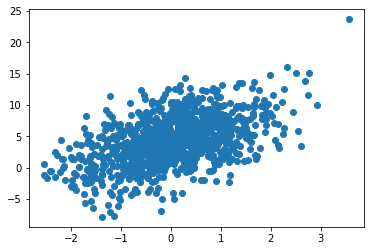

In [15]:
mxd2l.plt.scatter(features[:,0],labels[:,0]);

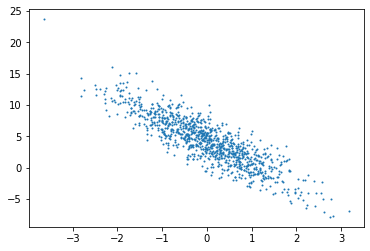

In [16]:
mxd2l.plt.scatter(features[:,1],labels[:,0],1);

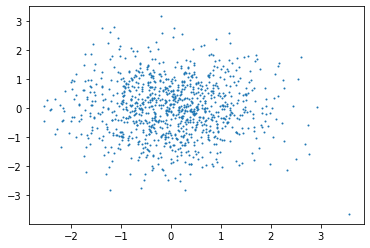

In [17]:
mxd2l.plt.scatter(features[:,0],features[:,1],1);

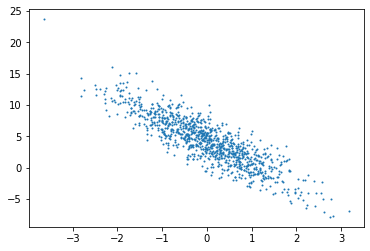

In [18]:
mxd2l.plt.scatter(mxd2l.numpy(features[:, 1]), mxd2l.numpy(labels), 1);

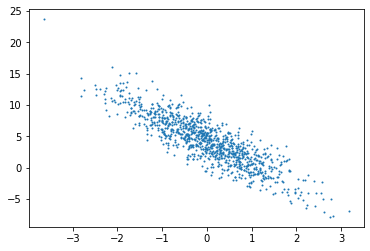

In [19]:
mxd2l.plt.scatter(features[:, 1], labels, 1);

## 3.2.2. Reading the Dataset

In [20]:
import random

### mxnet

In [112]:
true_w = mxnp.array([2, -3.4])
true_b = 4.2
features, labels = mxd2l.synthetic_data(true_w,true_b,1000)

In [113]:
def data_iter_mx(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))  # 必须转变成list
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=mxnp.array(indices[i:min(i+batch_size,num_examples)])
        print(batch_indices.shape,batch_indices)
        yield features[batch_indices],labels[batch_indices]    

In [115]:
for X, y in data_iter_mx(batch_size, features, labels):
    print(X.shape,  y.shape)
    print(X,"\n",  y)
    break

(5,) [981. 957. 838. 635. 100.]
(5, 2) (5, 1)


### torch

In [116]:
true_w = tc.tensor([2, -3.4])
true_b = 4.2
features, labels = tcd2l.synthetic_data(true_w, true_b, 1000)
features.shape, labels.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [117]:
def data_iter_tc(batch_size,features,labels):
    num_examples=len(labels)
    indices=tc.arange(num_examples)
    indices=list(indices) # 必须转变成list
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=tc.tensor(indices[i:min(i+batch_size,num_examples)])
        print(batch_indices.shape,batch_indices)
        yield features[batch_indices], labels[batch_indices]
    

In [121]:
for X, y in data_iter_tc(batch_size, features, labels):
    print(X.shape,  y.shape)
    print(X,"\n",  y)
    break

torch.Size([5]) tensor([166, 384, 293, 883, 532])
torch.Size([5, 2]) torch.Size([5, 1])
tensor([[ 0.0407,  0.8368],
        [ 0.3411,  0.8504],
        [-0.3765,  0.0892],
        [-0.7237,  0.6344],
        [-0.7765,  0.0094]]) 
 tensor([[1.4295],
        [2.0042],
        [3.1402],
        [0.6067],
        [2.6187]])


## tensorflow

In [195]:
true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = tfd2l.synthetic_data(true_w, true_b, 1000)
features.shape, labels.shape

(TensorShape([1000, 2]), TensorShape([1000, 1]))

In [196]:
def data_iter_tf(batch_size,features,labels):
    num_examples=len(labels)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=indices[i:min(i+batch_size,num_examples)]
        tf.print(f'batch_indices:{batch_indices}')
        yield tf.gather(features,batch_indices),tf.gather(labels,batch_indices)        
        #yield features[batch_indices],labels[batch_indices]  


In [197]:
batch_size = 5
for X, y in data_iter_tf(batch_size, features, labels):
    tf.print("-----------")
    tf.print(X.shape, y.shape)
    tf.print("-----------")
    tf.print(X, '\n', y)
    break

batch_indices:[953, 613, 449, 619, 268]
-----------
TensorShape([5, 2]) TensorShape([5, 1])
-----------
[[-0.200502068 0.874540865]
 [0.863131225 1.40887904]
 [0.219451711 -1.05398118]
 [0.428281695 1.55807102]
 [-0.453978628 1.40682888]] 
 [[0.844366074]
 [1.13491774]
 [8.22942638]
 [-0.244565338]
 [-1.50875831]]


In [187]:
indices1=list(tf.range(3));indices2=list(range(3))

In [189]:
# tf.constant(indices1) # 会报错，因为indices1已经是tf.constant了

In [190]:
tf.constant(indices2)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 2])>

In [191]:
random.shuffle(indices1);indices1

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>]

In [192]:
random.shuffle(indices2);indices2

[2, 1, 0]

In [198]:
tf.gather(features,indices1),tf.gather(features,indices2)

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 1.0623922 ,  0.05618829],
        [-1.2325829 , -1.8583493 ],
        [-0.40010998, -0.79346836]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.40010998, -0.79346836],
        [-1.2325829 , -1.8583493 ],
        [ 1.0623922 ,  0.05618829]], dtype=float32)>)

## shuffle前必须转变成list

In [71]:
a=tc.arange(10)
b=list(tc.arange(10))
a,b

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [tensor(0),
  tensor(1),
  tensor(2),
  tensor(3),
  tensor(4),
  tensor(5),
  tensor(6),
  tensor(7),
  tensor(8),
  tensor(9)])

In [72]:
random.shuffle(a)

In [73]:
a  # 结果取不到所有的数值

tensor([0, 1, 0, 0, 3, 2, 2, 2, 6, 1])

In [74]:
random.shuffle(b)

In [75]:
b 

[tensor(0),
 tensor(1),
 tensor(4),
 tensor(2),
 tensor(3),
 tensor(5),
 tensor(6),
 tensor(9),
 tensor(7),
 tensor(8)]